### CoffeeCappTransByMerchantInstantKpis

In [1]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import datetime
import numpy as np

# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'vpay-asdmi.public.21203d2a181c.database.windows.net,3342' 
database = 'VENPAY-BI' 
username = 'nandaa' 
password = 'Timileyin1998'  

engine = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = engine.cursor()

In [3]:

query = """
SELECT [PK_CoffeeCappTransByMerchantInstantKpisId]
            ,[ReferenceDate]
            ,[EK_MerchantId]
            ,[MerchantName]
            ,[TotalTransactionsCounter]
            ,[CompletedTransactionsCounter]
            ,[ValidationErrorsCounter]
            ,[ConnectionErrorsCounter]
            ,[RejectionErrorsCounter]
            ,[SystemErrorsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByMerchantInstantKpis]
"""

df_coffeeCappTransMerchant = pd.read_sql(query, engine)
df_coffeeCappTransMerchant

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter,ValidationErrorsCounter,ConnectionErrorsCounter,RejectionErrorsCounter,SystemErrorsCounter
0,1,2022-11-30 13:55:00,1,Vending Company,0,0,0,0,0,0
1,2,2022-11-30 13:55:00,2,BiTX,0,0,0,0,0,0
2,3,2022-11-30 13:55:00,4,Vaportris,0,0,0,0,0,0
3,4,2022-11-30 13:55:00,6,EOS Srl,0,0,0,0,0,0
4,5,2022-11-30 13:55:00,7,Your Best Break,1089,915,50,98,26,0
...,...,...,...,...,...,...,...,...,...,...
6131284,6141204,2023-10-03 11:30:00,121,SARL CRISTAL,0,0,0,0,0,0
6131285,6141205,2023-10-03 11:30:00,122,COFFING SERVICES,0,0,0,0,0,0
6131286,6141206,2023-10-03 11:30:00,123,CASALE ESPRESSO OCS,0,0,0,0,0,0
6131287,6141207,2023-10-03 11:30:00,124,MOKAMATIC,0,0,0,0,0,0


In [4]:

query = """
        SELECT MerchantName, SUM(TotalTransactionsCounter) AS TotalTrans, SUM(CompletedTransactionsCounter) AS TotalCompTrans  
        FROM CoffeeCappTransByMerchantInstantKpis
        GROUP BY MerchantName
"""

df_coffeeCappTransMerchantOne = pd.read_sql(query, engine)
df_coffeeCappTransMerchantOne 

,MerchantName,TotalTrans,TotalCompTrans
0,Trivending,0,0
1,Espressomat,385,302
2,GVR,0,0
3,Vending Company,368,290
4,COFFEE TIME SRL,0,0
...,...,...,...
85,Esperia,0,0
86,BiTX,0,0
87,Accenture,0,0
88,D8,0,0


In [5]:
query = """
SELECT [PK_CoffeeCappTransByMerchantInstantKpisId]
            ,[ReferenceDate]
            ,[EK_MerchantId]
            ,[MerchantName]
            ,[TotalTransactionsCounter]
            ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByMerchantInstantKpis]
WHERE  Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)=30
"""

df_coffeeCappTrans = pd.read_sql(query, engine)
df_coffeeCappTrans

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter
0,6055408,2023-09-30 03:10:00,121,SARL CRISTAL,0,0
1,6055409,2023-09-30 03:10:00,122,COFFING SERVICES,0,0
2,6055410,2023-09-30 03:10:00,123,CASALE ESPRESSO OCS,0,0
3,6055411,2023-09-30 03:10:00,124,MOKAMATIC,0,0
4,6055412,2023-09-30 03:10:00,125,COFFEE TIME SRL,0,0
...,...,...,...,...,...,...
25627,6074360,2023-09-30 20:55:00,116,Ada Vending Srl,0,0
25628,6074361,2023-09-30 20:55:00,117,EASY BREAK SRL,0,0
25629,6074362,2023-09-30 20:55:00,118,IDEA BREAK,0,0
25630,6074363,2023-09-30 20:55:00,119,Il Piacere di una Pausa,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

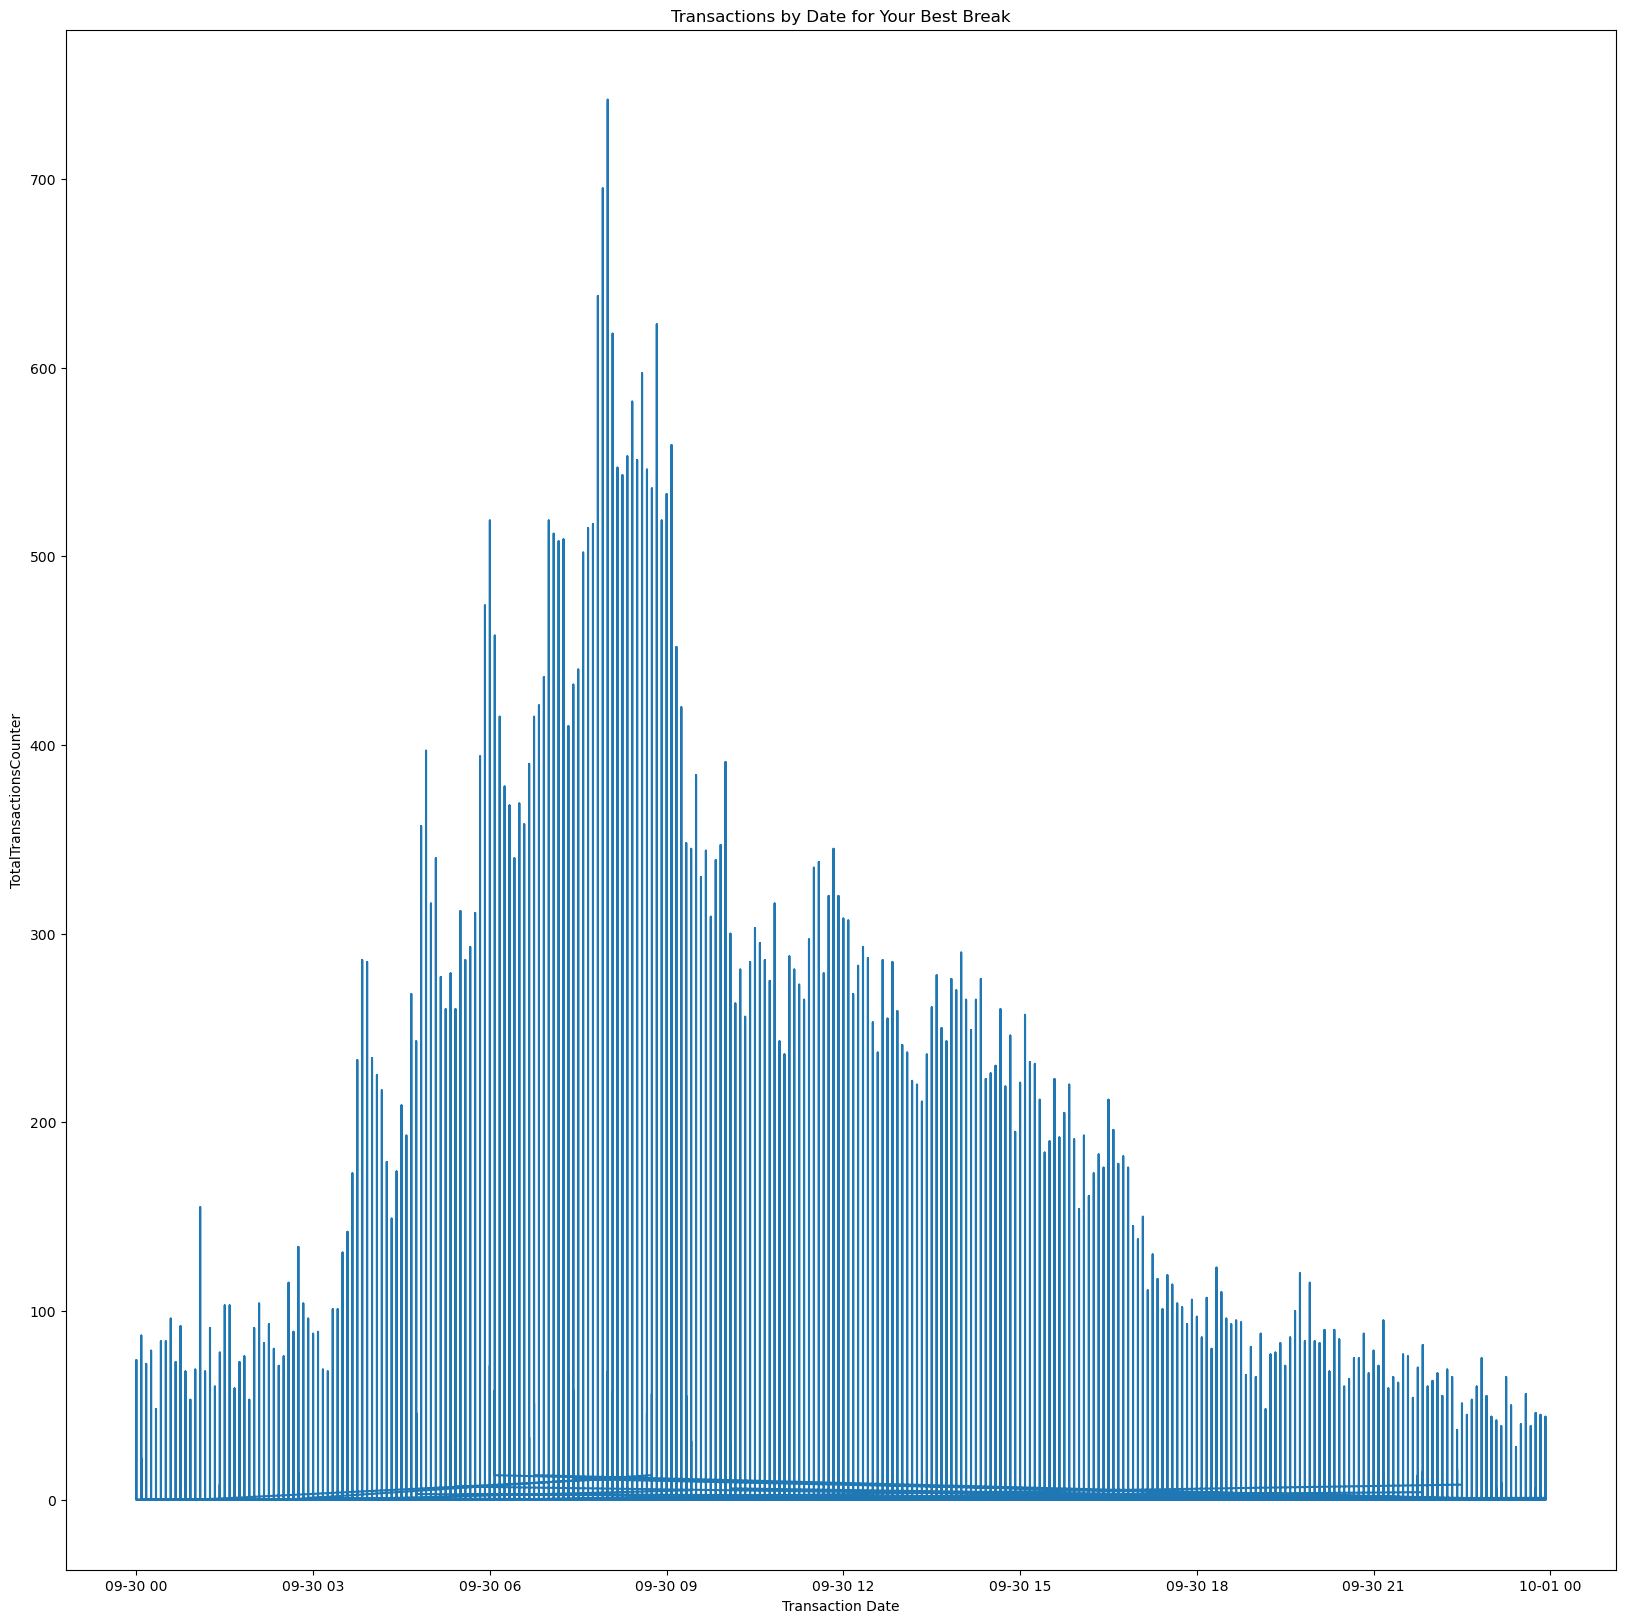

In [6]:
# Plotting the timeseries graph of given dataset
plt.figure(figsize=(20, 20))
plt.plot(df_coffeeCappTrans['ReferenceDate'], df_coffeeCappTrans['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for Your Best Break')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [7]:
query = """
SELECT [PK_CoffeeCappTransByMerchantInstantKpisId]
            ,[ReferenceDate]
            ,[EK_MerchantId]
            ,[MerchantName]
            ,[TotalTransactionsCounter]
            ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByMerchantInstantKpis]
WHERE MerchantName = 'Your Best Break' AND Month(ReferenceDate)=11 and year(referencedate)= 2022
"""

df_coffeeCappTransBestBreak = pd.read_sql(query, engine)
df_coffeeCappTransBestBreak

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter
0,5,2022-11-30 13:55:00,7,Your Best Break,1089,915
1,59,2022-11-30 14:00:00,7,Your Best Break,1204,919
2,113,2022-11-30 14:05:00,7,Your Best Break,1177,924
3,167,2022-11-30 14:10:00,7,Your Best Break,1175,994
4,221,2022-11-30 14:15:00,7,Your Best Break,1111,911
...,...,...,...,...,...,...
116,6269,2022-11-30 23:35:00,7,Your Best Break,99,73
117,6323,2022-11-30 23:40:00,7,Your Best Break,61,59
118,6377,2022-11-30 23:45:00,7,Your Best Break,56,53
119,6431,2022-11-30 23:50:00,7,Your Best Break,80,76


Text(0, 0.5, 'TotalTransactionsCounter')

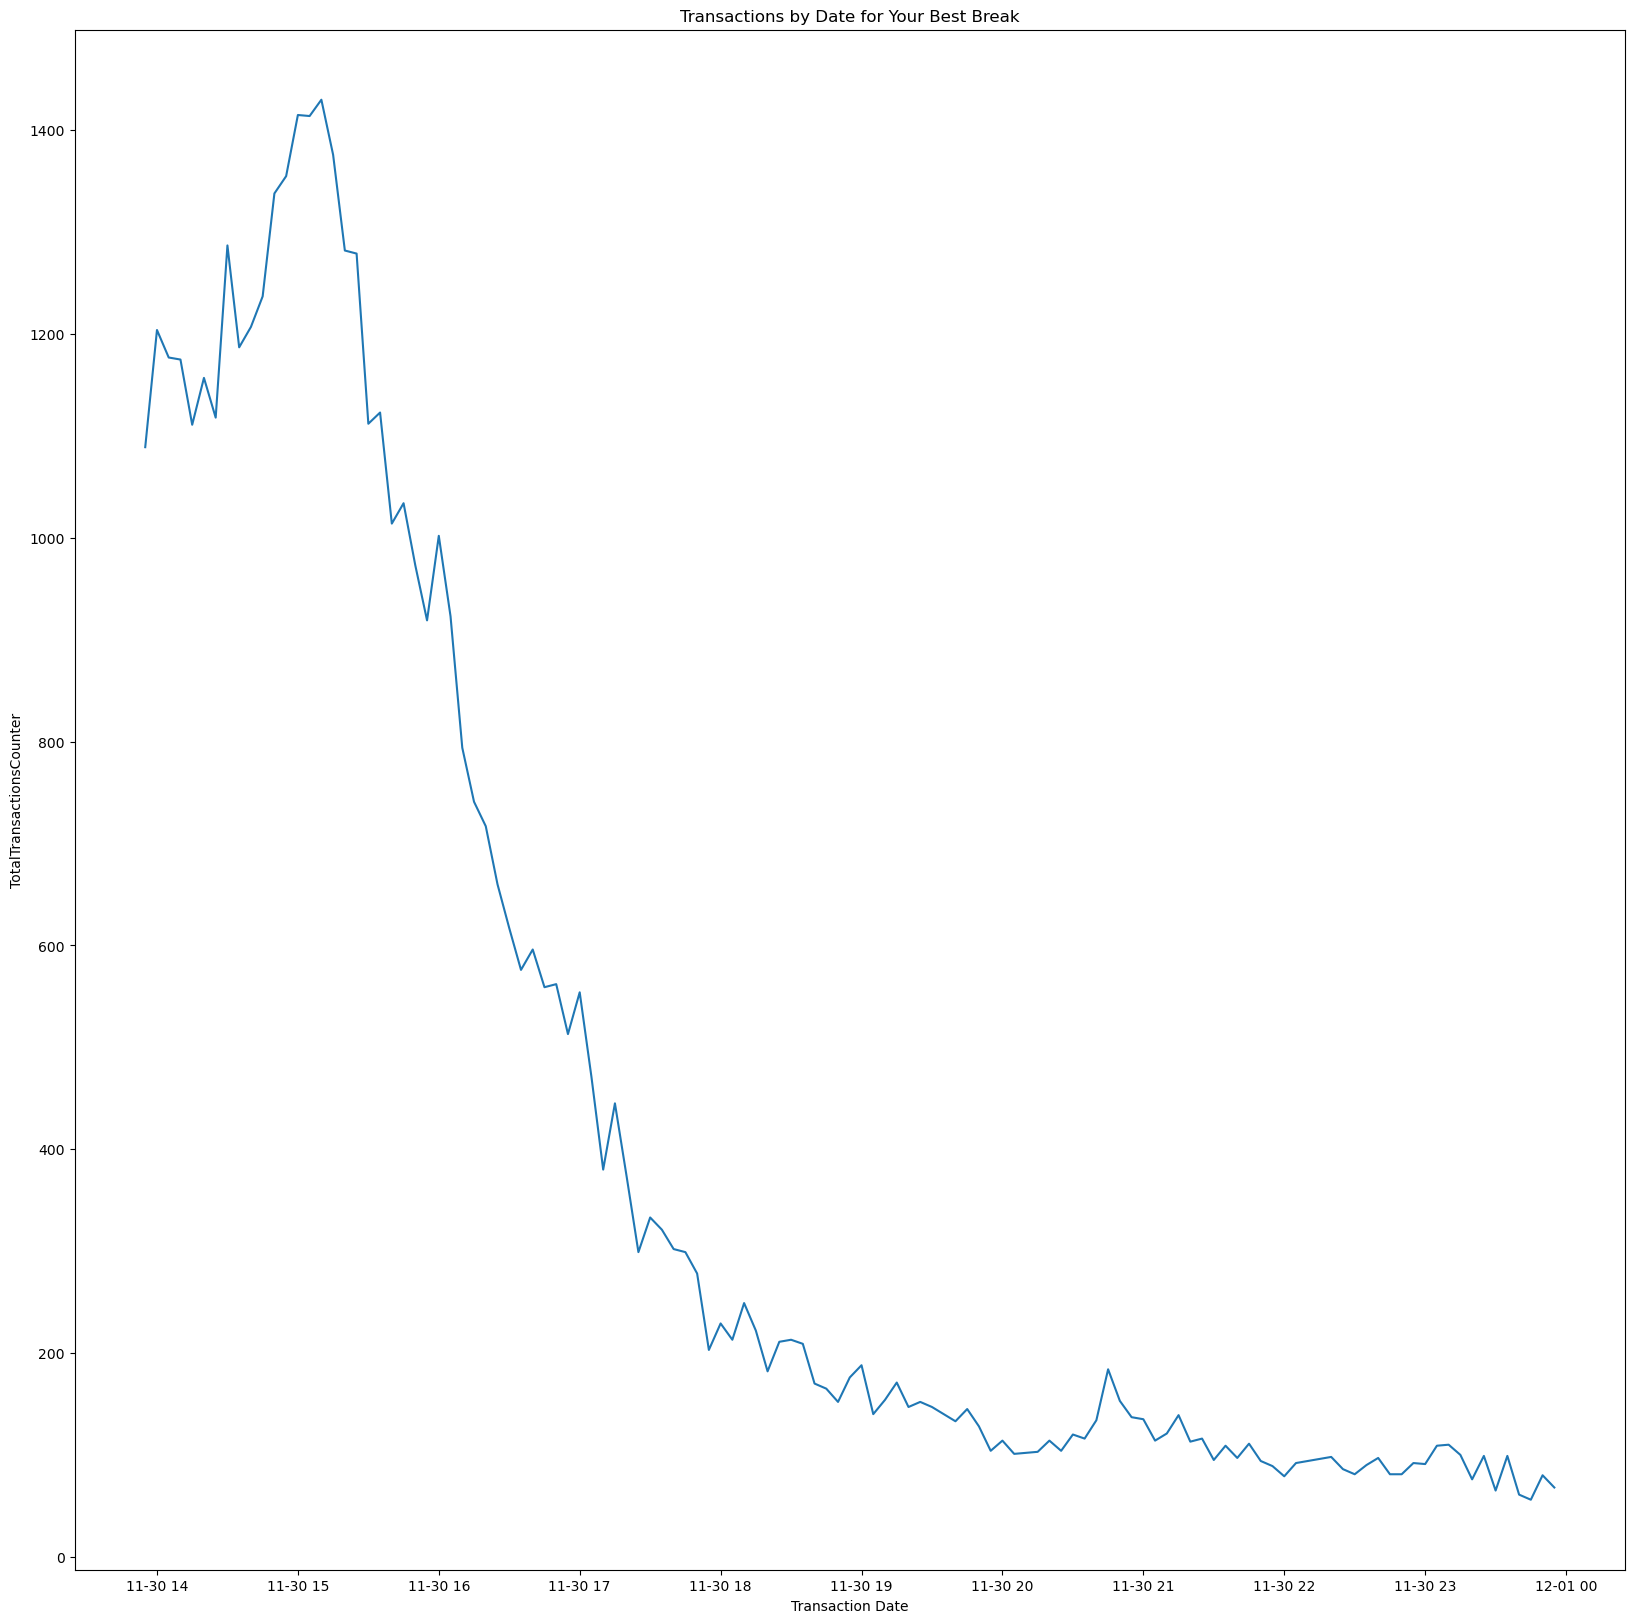

In [8]:
# Plotting the timeseries graph of given dataset
plt.figure(figsize=(20, 20))
plt.plot(df_coffeeCappTransBestBreak['ReferenceDate'], df_coffeeCappTransBestBreak['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for Your Best Break')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [9]:
query = """
SELECT [PK_CoffeeCappTransByMerchantInstantKpisId]
            ,[ReferenceDate]
            ,[EK_MerchantId]
            ,[MerchantName]
            ,[TotalTransactionsCounter]
            ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByMerchantInstantKpis]
WHERE MerchantName = 'Your Best Break' AND Month(ReferenceDate)=09 and year(referencedate)= 2023 and day(referencedate)=30
"""

df_coffeeCappTransBestBreak = pd.read_sql(query, engine)
df_coffeeCappTransBestBreak

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter
0,6051946,2023-09-30 00:00:00,7,Your Best Break,74,68
1,6052035,2023-09-30 00:05:00,7,Your Best Break,87,69
2,6052124,2023-09-30 00:10:00,7,Your Best Break,72,65
3,6052213,2023-09-30 00:15:00,7,Your Best Break,79,73
4,6052302,2023-09-30 00:20:00,7,Your Best Break,48,47
...,...,...,...,...,...,...
283,6073929,2023-09-30 20:35:00,7,Your Best Break,64,57
284,6074018,2023-09-30 20:40:00,7,Your Best Break,75,45
285,6074107,2023-09-30 20:45:00,7,Your Best Break,75,66
286,6074196,2023-09-30 20:50:00,7,Your Best Break,88,70


Text(0, 0.5, 'TotalTransactionsCounter')

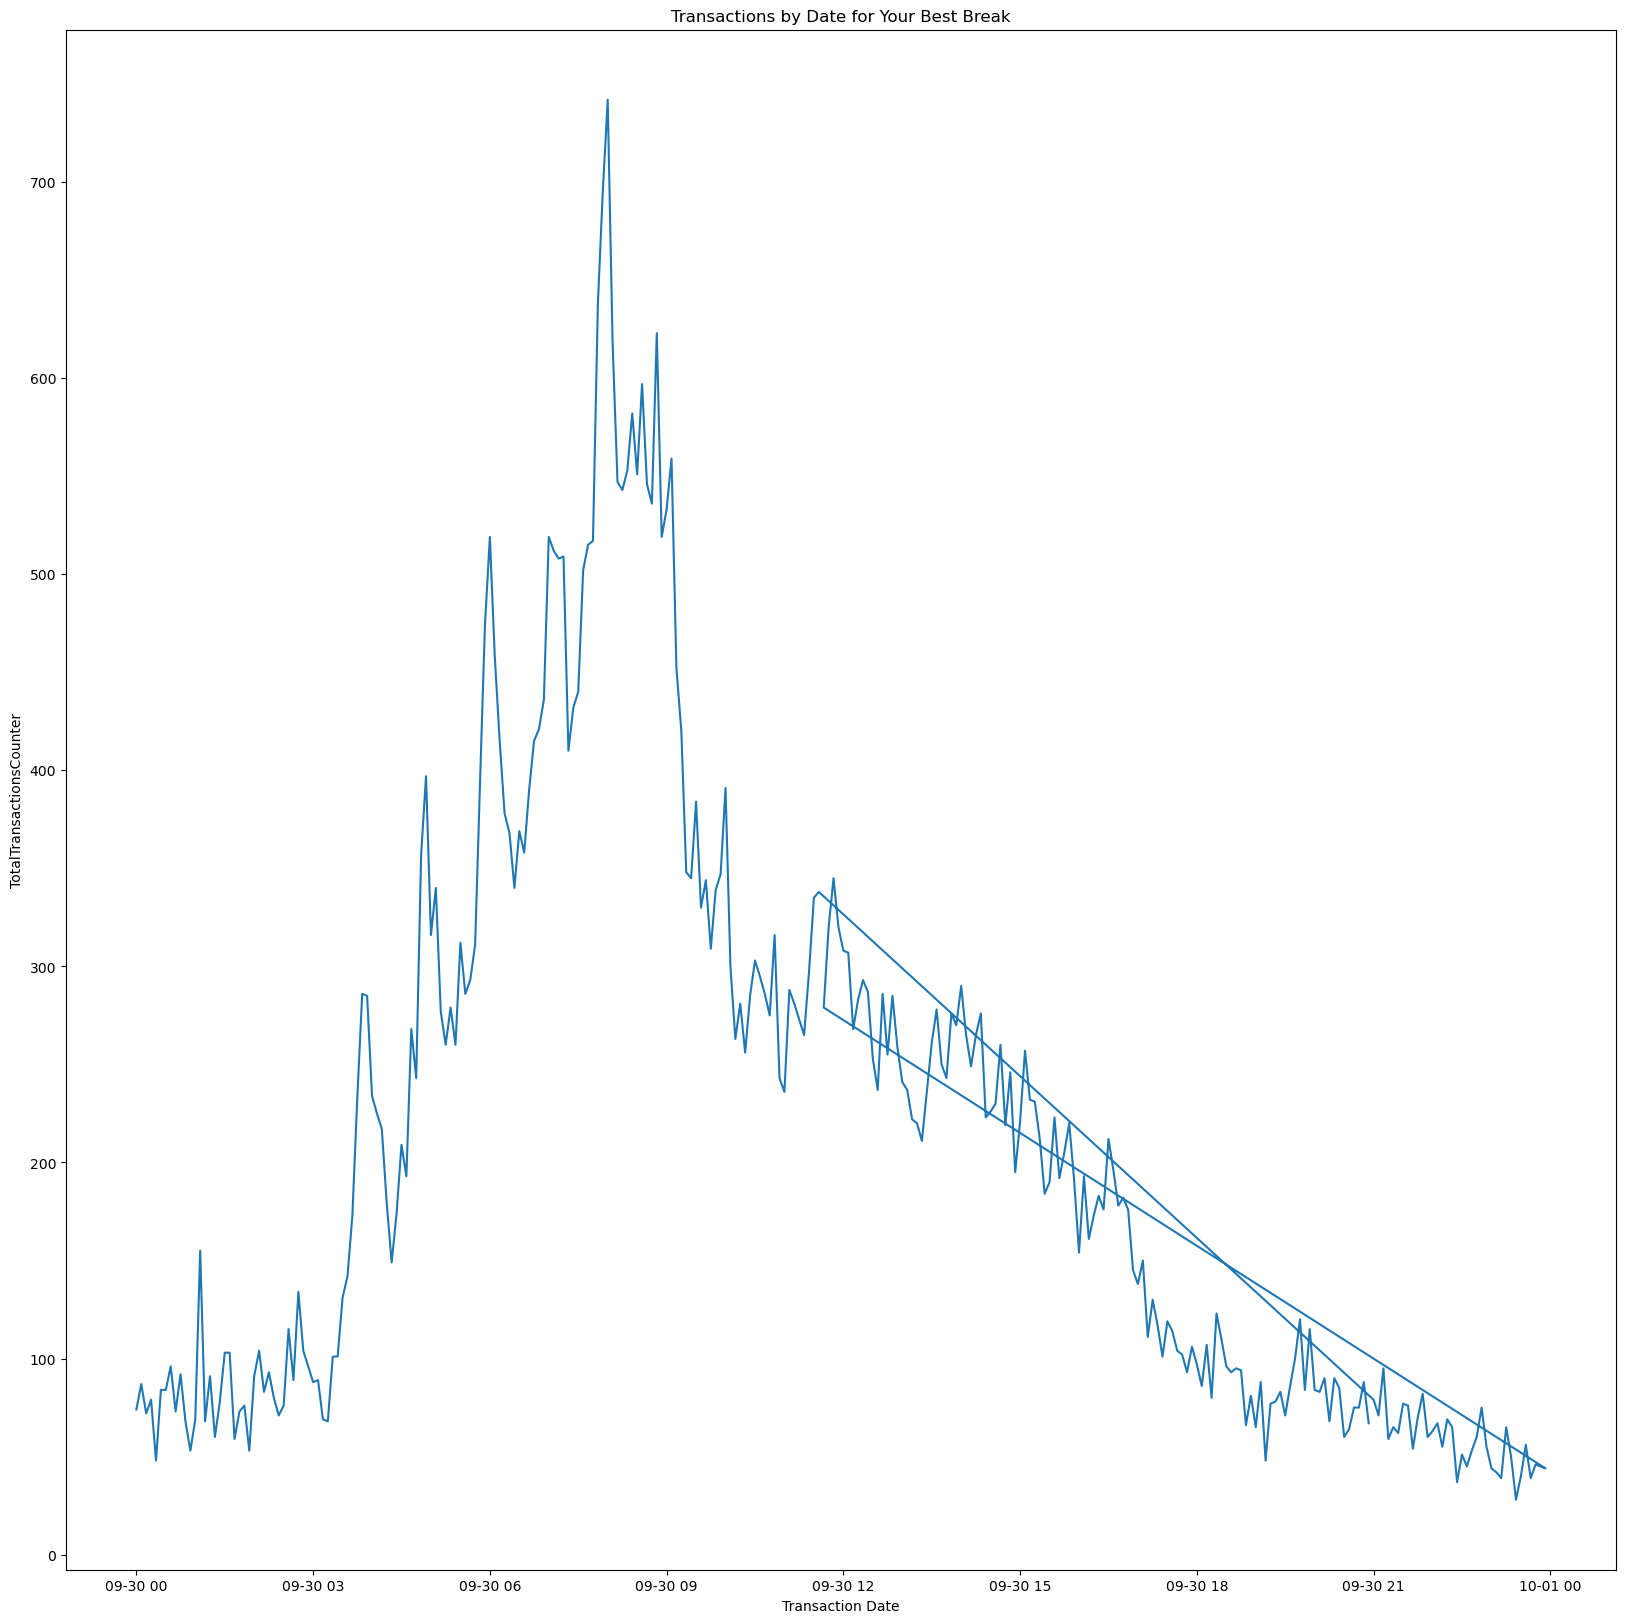

In [10]:
# Plotting the timeseries graph of given dataset
plt.figure(figsize=(20, 20))
plt.plot(df_coffeeCappTransBestBreak['ReferenceDate'], df_coffeeCappTransBestBreak['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for Your Best Break')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [11]:
query = """
SELECT [PK_CoffeeCappTransByMerchantInstantKpisId]
            ,[ReferenceDate]
            ,[EK_MerchantId]
            ,[MerchantName]
            ,[TotalTransactionsCounter]
            ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByMerchantInstantKpis]
WHERE MerchantName = 'Vending Company'	AND Month(ReferenceDate)=09 and year(referencedate)= 2023
"""

df_coffeeCappTransVend = pd.read_sql(query, engine)
df_coffeeCappTransVend

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter
0,5358946,2023-09-01 07:00:00,1,Vending Company,0,0
1,5359027,2023-09-01 07:05:00,1,Vending Company,0,0
2,5359108,2023-09-01 07:10:00,1,Vending Company,0,0
3,5359189,2023-09-01 07:15:00,1,Vending Company,0,0
4,5359270,2023-09-01 07:20:00,1,Vending Company,0,0
...,...,...,...,...,...,...
8635,5979229,2023-09-27 03:55:00,1,Vending Company,0,0
8636,5979318,2023-09-27 04:00:00,1,Vending Company,0,0
8637,5979407,2023-09-27 04:05:00,1,Vending Company,0,0
8638,5979496,2023-09-27 04:10:00,1,Vending Company,0,0


Text(0, 0.5, 'TotalTransactionsCounter')

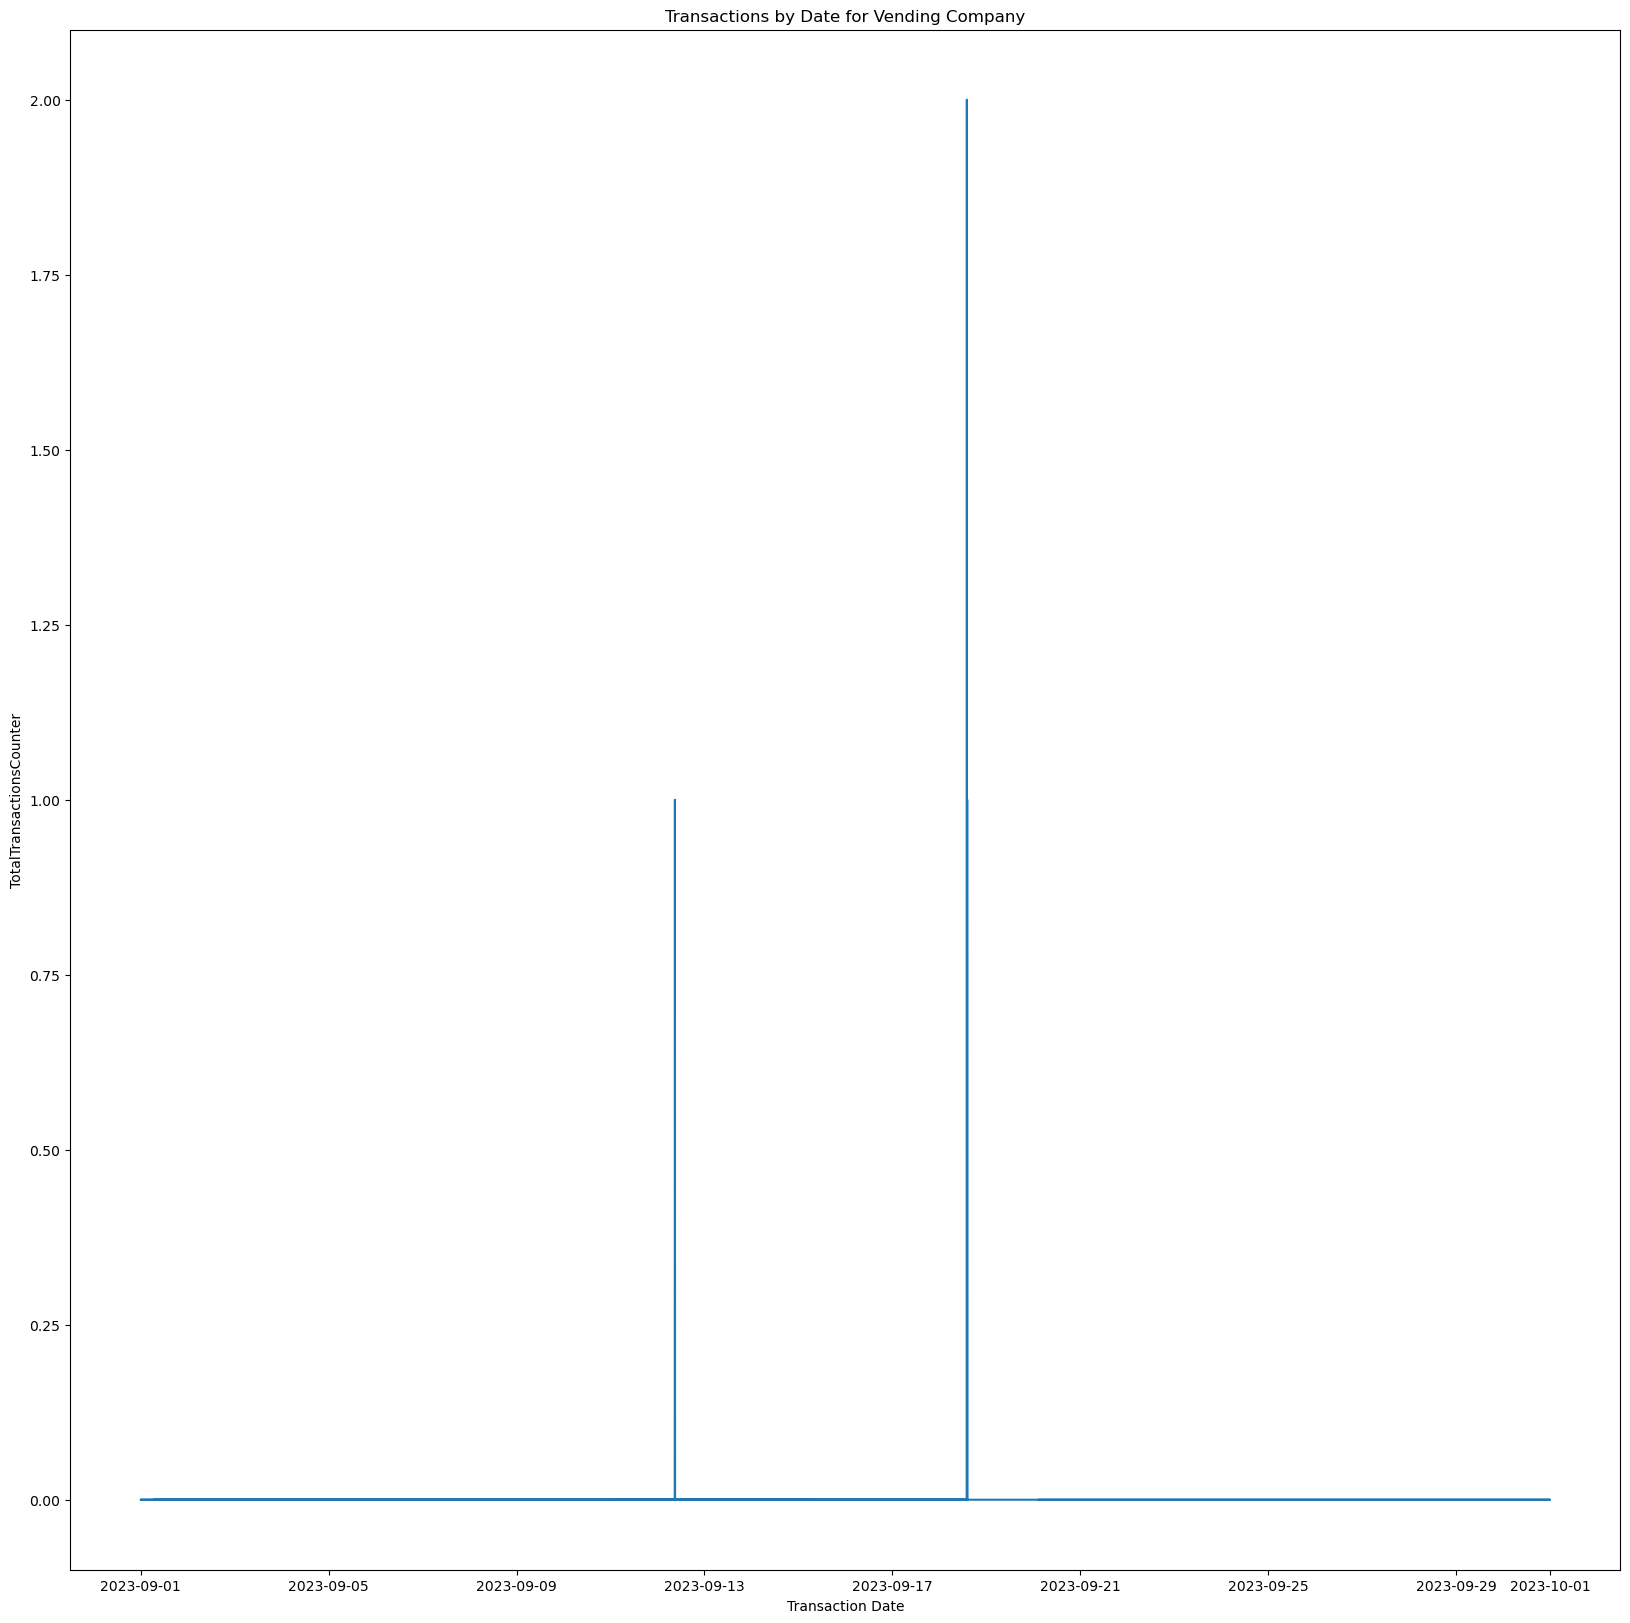

In [12]:
plt.figure(figsize=(20, 20))
plt.plot(df_coffeeCappTransVend['ReferenceDate'], df_coffeeCappTransVend['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for Vending Company')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')

In [13]:
query = """
SELECT [PK_CoffeeCappTransByMerchantInstantKpisId]
            ,[ReferenceDate]
            ,[EK_MerchantId]
            ,[MerchantName]
            ,[TotalTransactionsCounter]
            ,[CompletedTransactionsCounter]
FROM [VENPAY-BI].[dbo].[CoffeeCappTransByMerchantInstantKpis]
WHERE MerchantName = 'Vending Company'	AND Month(ReferenceDate)=09 and year(referencedate)= 2023 AND TotalTransactionsCounter!=0
"""

df_coffeeCappTransVend = pd.read_sql(query, engine)
df_coffeeCappTransVend

,PK_CoffeeCappTransByMerchantInstantKpisId,ReferenceDate,EK_MerchantId,MerchantName,TotalTransactionsCounter,CompletedTransactionsCounter
0,5772326,2023-09-18 14:05:00,1,Vending Company,2,2
1,5772488,2023-09-18 14:15:00,1,Vending Company,1,1
2,5627336,2023-09-12 08:55:00,1,Vending Company,1,1


Text(0, 0.5, 'TotalTransactionsCounter')

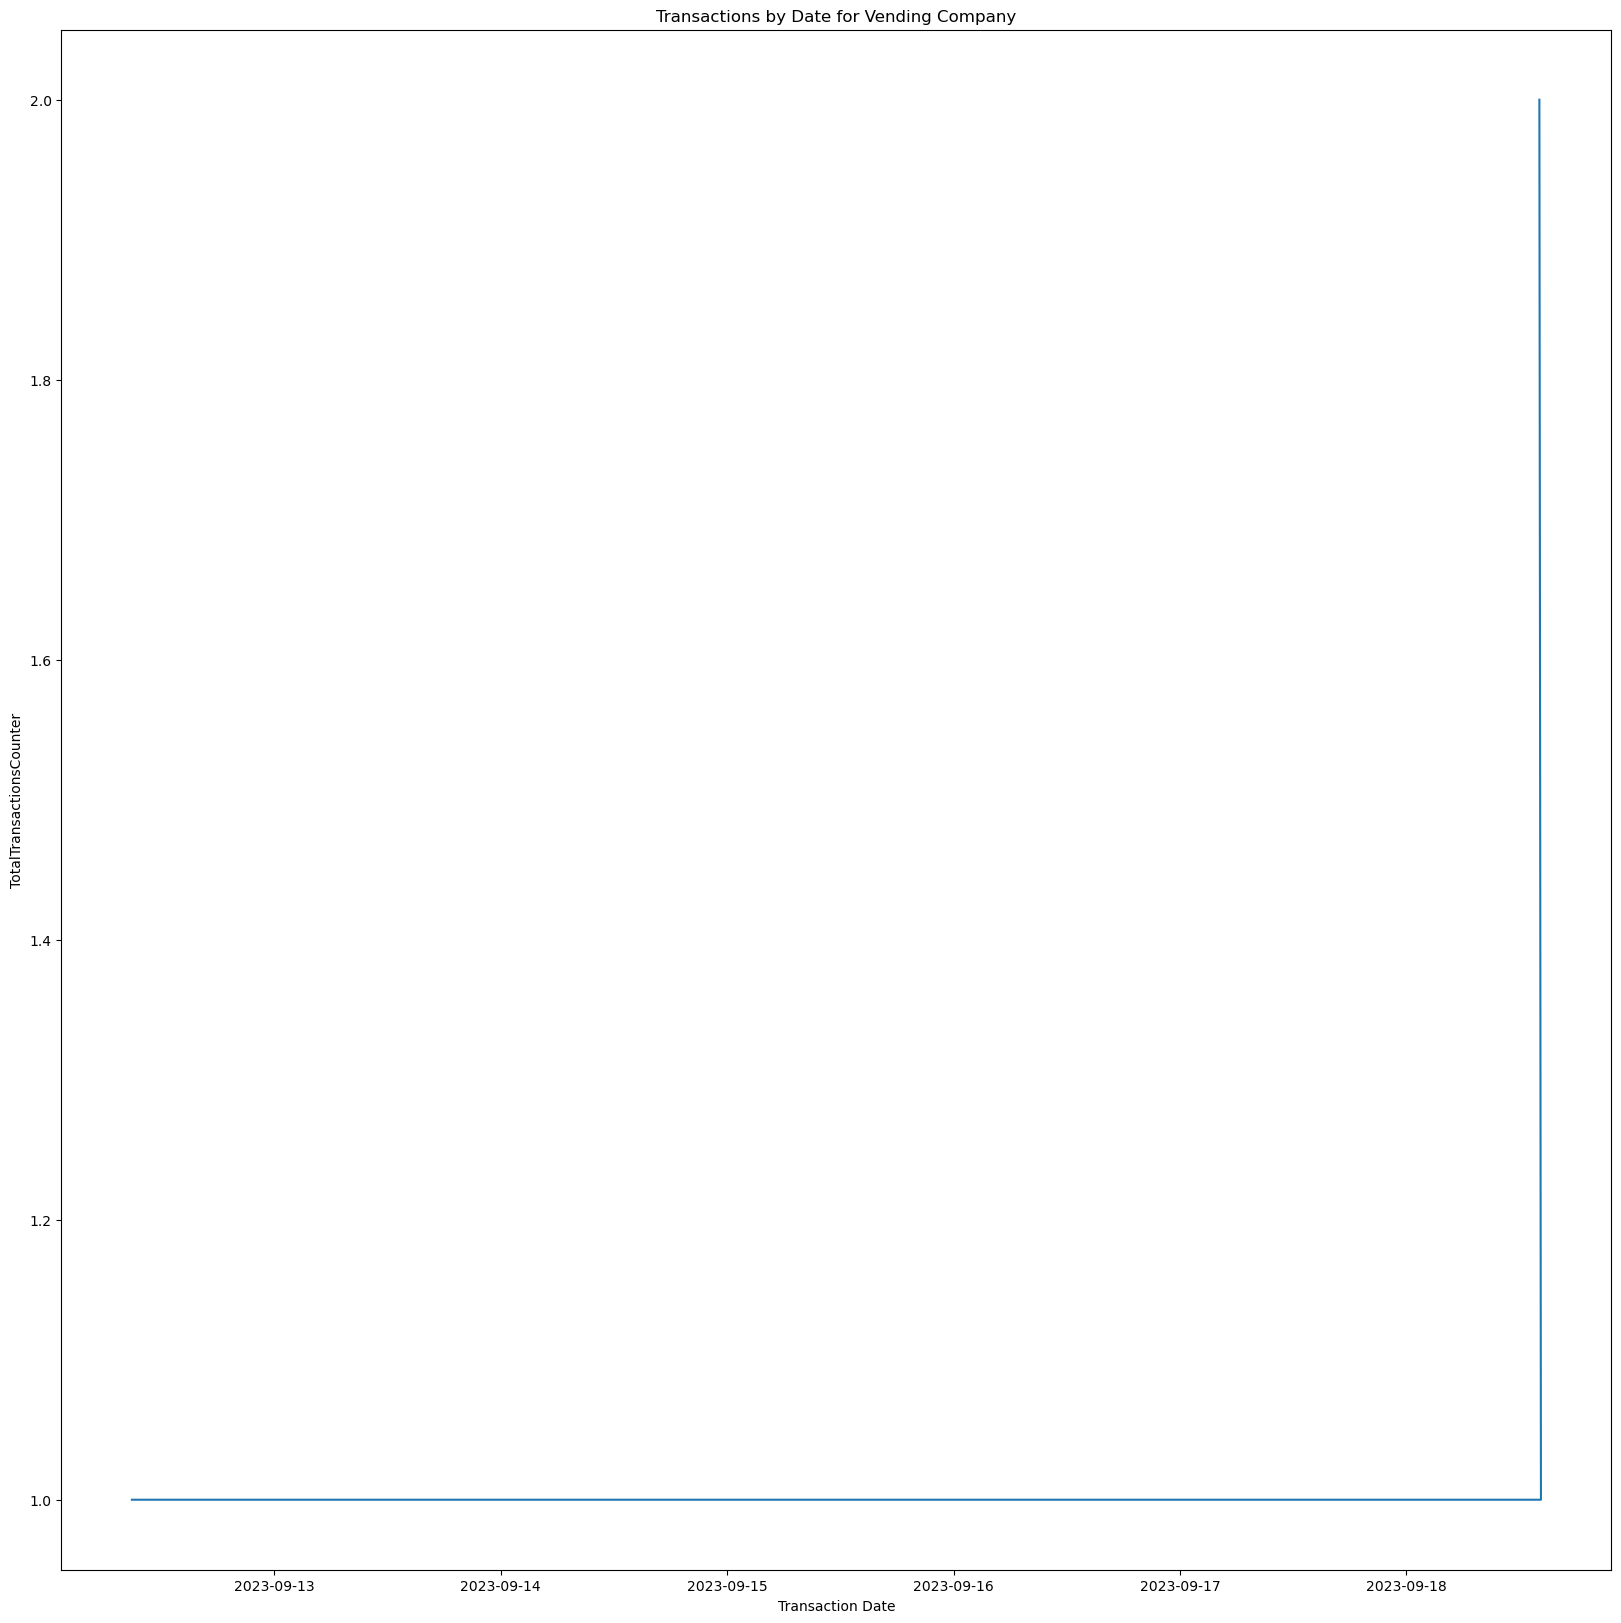

In [14]:
plt.figure(figsize=(20, 20))
plt.plot(df_coffeeCappTransVend['ReferenceDate'], df_coffeeCappTransVend['TotalTransactionsCounter'])

# Giving title to the graph
plt.title('Transactions by Date for Vending Company')

# Giving x and y label to the graph
plt.xlabel('Transaction Date')
plt.ylabel('TotalTransactionsCounter')